In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm

In [2]:
input_data = pd.read_csv(r'C:/Users/George/Desktop/Magistratyra/Project/Concantinate/result.csv', index_col='Unnamed: 0')
input_data.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
input_data = input_data.sort_index() # sort in

In [3]:
data = input_data.AQI[:-20]

Попробуем построить модель по нескольким типам почти оптимальных параметров

(1, 0, 0) (2, 1, 1, 12) MSE=609.1946272871193<br>
(1, 0, 0) (0, 1, 2, 12) MSE=600.8341704351213<br>
(3, 0, 0) (1, 1, 2, 12) MSE=600.763146228274<br>
(3, 1, 0) (1, 0, 0, 12) MSE=600.7599237577756<br>
(4, 0, 0) (0, 1, 2, 12) MSE=600.7021632738542<br>
(4, 0, 1) (0, 1, 2, 12) MSE=600.7788251139816<br>

# Обучаем несколько моделей с разными гиперпараметрами

In [4]:
%%time
model1 = sm.tsa.statespace.SARIMAX(data, order=(1, 0, 0), 
                                        seasonal_order=(2, 1, 1, 12)).fit(disp=-1)
model2 = sm.tsa.statespace.SARIMAX(data, order=(1, 0, 0), 
                                        seasonal_order=(0, 1, 2, 12)).fit(disp=-1)
model3 = sm.tsa.statespace.SARIMAX(data, order=(3, 0, 0), 
                                        seasonal_order=(1, 1, 2, 12)).fit(disp=-1)
model4 = sm.tsa.statespace.SARIMAX(data, order=(3, 1, 0), 
                                        seasonal_order=(1, 0, 0, 12)).fit(disp=-1)
model5 = sm.tsa.statespace.SARIMAX(data, order=(4, 0, 0), 
                                        seasonal_order=(0, 1, 2, 12)).fit(disp=-1)
model6 = sm.tsa.statespace.SARIMAX(data, order=(4, 0, 1), 
                                        seasonal_order=(0, 1, 2, 12)).fit(disp=-1)

C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\George\AppData\Local\Programs\Python\Python39\lib\s

CPU times: total: 2min 36s
Wall time: 1min 39s


# Для каждой получим предсказание и нарисуем графики

сдвинем все предсказания на 1 период

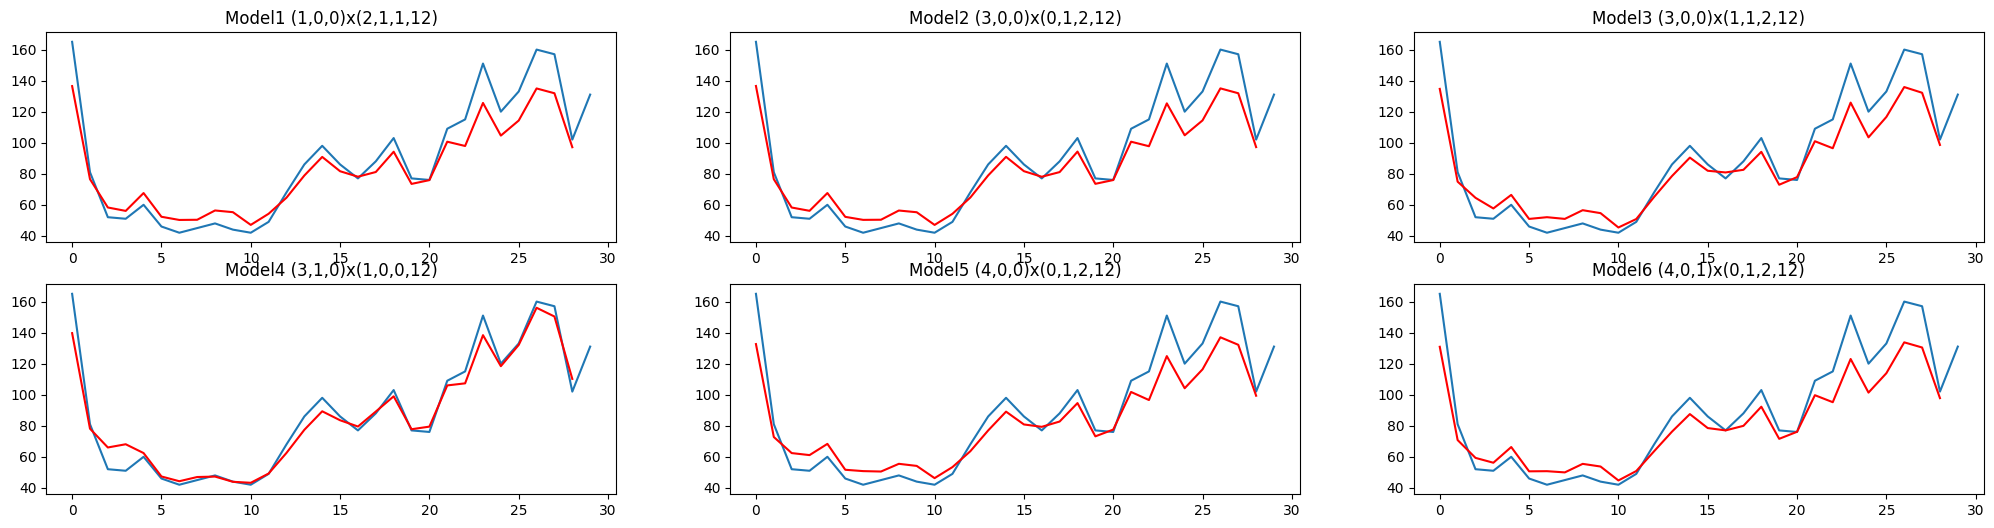

In [17]:
preds_df1 = (model1.get_prediction(start='2014-01-01', end='2014-01-30').summary_frame(alpha=0.05))
preds_df2 = (model2.get_prediction(start='2014-01-01', end='2014-01-30').summary_frame(alpha=0.05))
preds_df3 = (model3.get_prediction(start='2014-01-01', end='2014-01-30').summary_frame(alpha=0.05))
preds_df4 = (model4.get_prediction(start='2014-01-01', end='2014-01-30').summary_frame(alpha=0.05))
preds_df5 = (model5.get_prediction(start='2014-01-01', end='2014-01-30').summary_frame(alpha=0.05))
preds_df6 = (model6.get_prediction(start='2014-01-01', end='2014-01-30').summary_frame(alpha=0.05))

y = data['2014-01-01':'2014-01-30']
x = np.arange(len(preds_df1))
figure, axis = plt.subplots(2, 3,figsize=(25,6))

# plt.plot(x, preds_df['mean'], color = 'green')
# plt.plot(x, y, color = 'red')

axis[0, 0].plot(x, y)
axis[0, 0].plot(x, preds_df1['mean'].shift(periods=-1), color = 'red')
axis[0, 0].set_title("Model1 (1,0,0)x(2,1,1,12)")

axis[0, 1].plot(x, y)
axis[0, 1].plot(x, preds_df2['mean'].shift(periods=-1), color = 'red')
axis[0, 1].set_title("Model2 (3,0,0)x(0,1,2,12)")

axis[0, 2].plot(x, y)
axis[0, 2].plot(x, preds_df3['mean'].shift(periods=-1), color = 'red')
axis[0, 2].set_title("Model3 (3,0,0)x(1,1,2,12)")

axis[1, 0].plot(x, y)
axis[1, 0].plot(x, preds_df4['mean'].shift(periods=-1), color = 'red')
axis[1, 0].set_title("Model4 (3,1,0)x(1,0,0,12)")

axis[1, 1].plot(x, y)
axis[1, 1].plot(x, preds_df5['mean'].shift(periods=-1), color = 'red')
axis[1, 1].set_title("Model5 (4,0,0)x(0,1,2,12)")

axis[1, 2].plot(x, y)
axis[1, 2].plot(x, preds_df6['mean'].shift(periods=-1), color = 'red')
axis[1, 2].set_title("Model6 (4,0,1)x(0,1,2,12)")

plt.show()

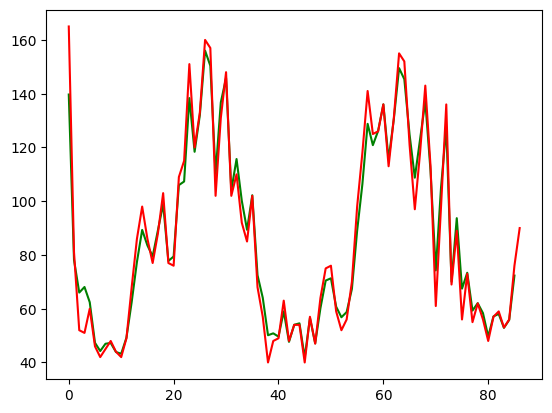

In [29]:
preds_df4 = (model4.get_prediction(start='2014-01-01', end='2014-03-28').summary_frame(alpha=0.05))
y = data['2014-01-01':'2014-03-28']

x = np.arange(len(preds_df4))

plt.plot(x, preds_df4['mean'].shift(periods=-1), color = 'green')
plt.plot(x, y, color = 'red')

# Найдем разность показний временного ряда с предсказанием

In [21]:
a1 = []
b1 = []
b2 = []
b3 = []
b4 = []
b5 = []
b6 = []
for i in y:
    a1.append(i)
for l1 in preds_df1['mean'].shift(periods=-1):
    b1.append(l1)
for l2 in preds_df2['mean'].shift(periods=-1):
    b2.append(l2)
for l3 in preds_df3['mean'].shift(periods=-1):
    b3.append(l3)
for l4 in preds_df4['mean'].shift(periods=-1):
    b4.append(l4)
for l5 in preds_df5['mean'].shift(periods=-1):
    b5.append(l5)
for l6 in preds_df6['mean'].shift(periods=-1):
    b6.append(l6)
    
c1 = np.array(a1) - np.array(b1)
c2 = np.array(a1) - np.array(b2)
c3 = np.array(a1) - np.array(b3)
c4 = np.array(a1) - np.array(b4)
c5 = np.array(a1) - np.array(b5)
c6 = np.array(a1) - np.array(b6)

In [25]:
c4

array([ 25.31822734,   2.8799319 , -14.00494704, -17.08169166,
        -2.4059112 ,  -1.31986603,  -2.25921244,  -1.96979033,
         0.74598768,   0.10921161,  -1.25136051,  -0.22010504,
         5.49132419,   8.60960393,   8.68666446,   2.45597879,
        -2.50237498,  -1.14208903,   4.04231902,  -0.75958583,
        -3.43538364,   3.01823049,   7.6762919 ,  12.63604434,
         1.61532192,   0.93503511,   3.98967584,   6.61799173,
        -8.17588654,          nan])

### максимальное значение разности и среднего по разности предсказкний  у моделей <br>
#### наилучшее у модели4 , но все равно большое

In [24]:
from statistics import mean
print('максимальное модель1 ',abs(max(c1,key=abs)))
print('среднее модель1 ',mean(c1))

print('максимальное модель2',abs(max(c2,key=abs)))
print('среднее модель2 ',mean(c2))

print('максимальное модель3 ',abs(max(c3,key=abs)))
print('среднее модель3 ',mean(c3))

print('максимальное модель4 ',abs(max(c4,key=abs)))
print('среднее модель4 ',mean(c4))

print('максимальное модель5 ',abs(max(c5,key=abs)))
print('среднее модель5 ',mean(c5))

print('максимальное модель6 ',abs(max(c6,key=abs)))
print('среднее модель6 ',mean(c6))

максимальное модель1  28.52272433554606
среднее модель1  nan
максимальное модель2 28.44914262518529
среднее модель2  nan
максимальное модель3  30.31683434056015
среднее модель3  nan
максимальное модель4  25.31822733668855
среднее модель4  nan
максимальное модель5  32.37376183668482
среднее модель5  nan
максимальное модель6  34.121527927884415
среднее модель6  nan
